In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14483, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 14483 (delta 16), reused 28 (delta 9), pack-reused 14446
Receiving objects: 100% (14483/14483), 13.52 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (9987/9987), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 4.8 MB/s 
     |████████████████████████████████| 41 kB 205 kB/s 
     |████████████████████████████████| 138 kB 7.8 MB/s 
     |████████████████████████████████| 54 kB 353 kB/s 
     |████████████████████████████████| 67 kB 7.2 MB/s 
     |████████████████████████████████| 178 kB 49.8 MB/s 
     |████████████████████████████████| 145 kB 55.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [2]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8ZCgxk8Dp4WDfKHzTqNG")
project = rf.workspace("cesar-school-jtqzc").project("projeto-deteccao")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Projeto-Detecção--1 in yolov5pytorch:: 100%|██████████| 1660/1660 [00:01<00:00, 1436.95it/s]


In [4]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
!python train.py --img 640 --batch 64 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Projeto-Detecção--1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h

In [6]:
%cp -r /content/yolov5/runs/train /content/gdrive/MyDrive/

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Projeto-Detecção--1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /content/yolov5/Projeto-Detecção--1/test/images/DOG--70-_jpg.rf.ea6f57a1f9792822e0fb995b8cfc944b.jpg: 416x416 1 Dog, 8.0ms
image 2/4 /content/yolov5/Projeto-Detecção--1/test/images/DOG--91-_jpg.rf.9194fd9ba031c81ab7ab84eed34cf4ac.jpg: 416x416 1 Dog, 8.0ms
image 3/4 /content/yolov5/Projeto-Detecção--1/test/im

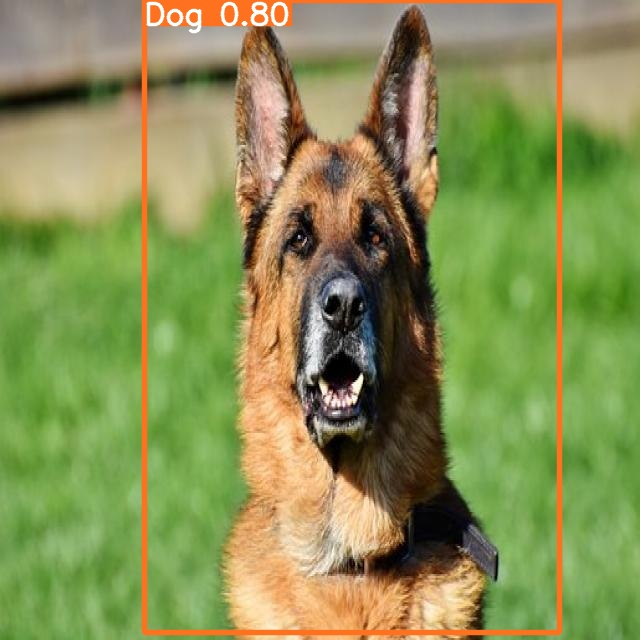

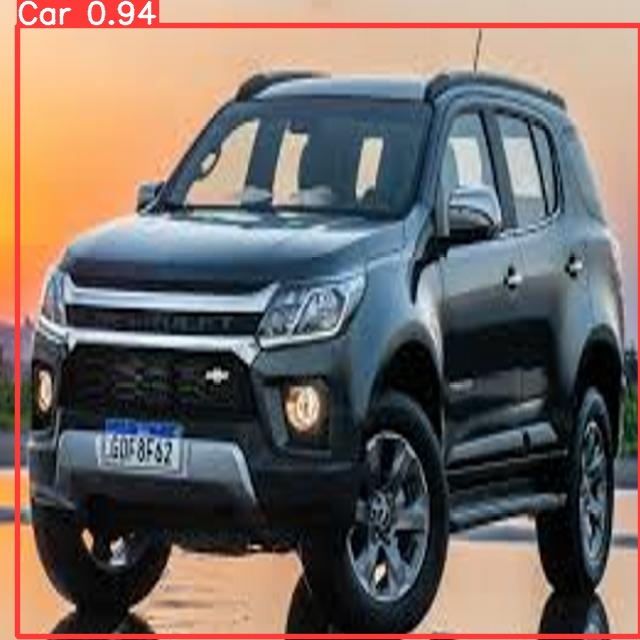

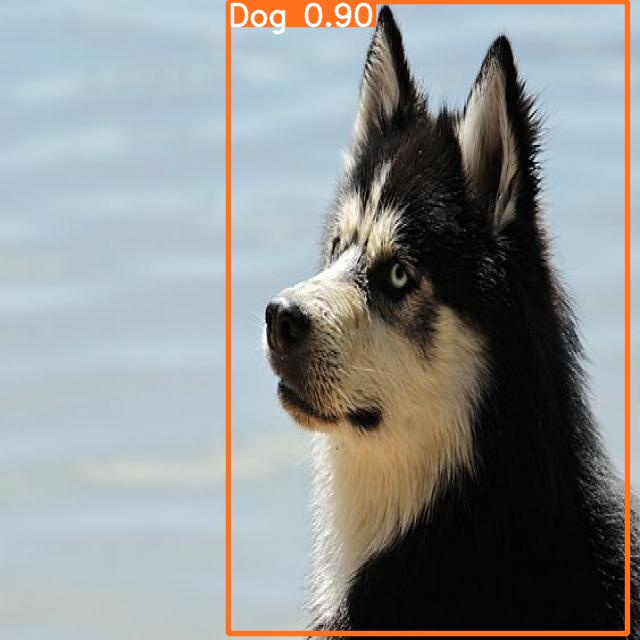

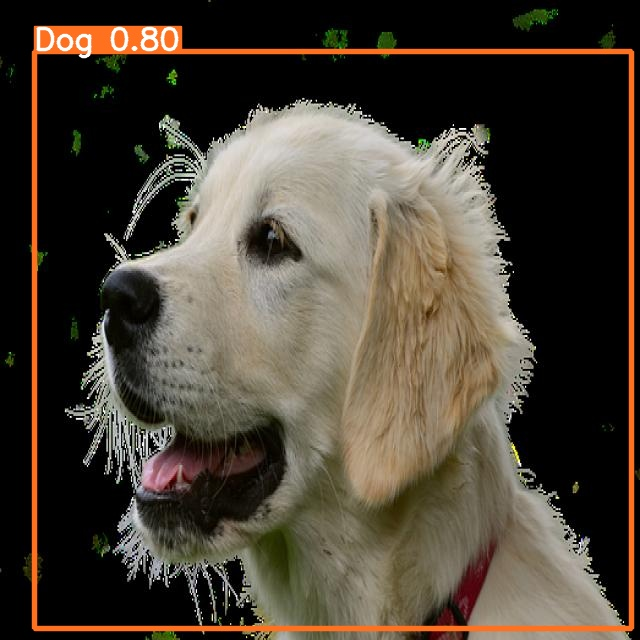

In [8]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [9]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>